In [26]:
from PIL import Image
from matplotlib.pyplot import imshow
from IPython.display import display # to display images
from multiprocessing import Process
import histogram as htg
import aHash as ah
import pHash as ph
import dHash as dh
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

In [27]:
# file path

case_name = "case01"
experiment_type = "bag_color(from_sk)"
file_path = "D:\\GitHub\\analysis_generated_pictures\\category\\"+experiment_type+"\\"+case_name

print(file_path)

D:\GitHub\analysis_generated_pictures\category\bag_color(from_sk)\case01


# CycleCoopnet

target picture:
num of compare pictures:  100
compare pictures:


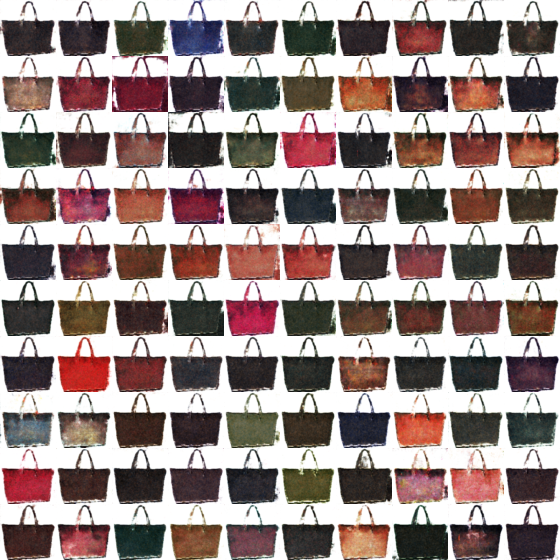

finish: [0/100]
finish: [10/100]
finish: [20/100]
finish: [30/100]
finish: [40/100]
finish: [50/100]
finish: [60/100]
finish: [70/100]
finish: [80/100]
finish: [90/100]


In [28]:
model_name = "cyclecoopnet"

# A_gen A_recover
# B_gen B_recover

#opens images:
model_path = file_path+"\\"+model_name
model_filelist = glob(model_path+"\\*.png")

# print("compare:")
# for img_path in compare_filelist:
#     print(img_path)

# target_path = "D:\\GitHub\\!_results\\real\\bag_B\\1_B.jpg"
target = glob(file_path+"\\real.jpg") # target only one
# target = glob(target_path) # target only one
print("target picture:")
for img_path in target:
#     print(img_path)
    img_target = Image.open(img_path)
    display(img_target)

result_width, result_height = 560, 560
result_im = Image.new('RGB', (result_width, result_height))

x, y = 0, 0
step_size = 56

print("num of compare pictures: ",len(model_filelist))

for file in model_filelist:
    im = Image.open(file)
    im = im.resize((step_size, step_size), Image.BILINEAR )
    result_im.paste(im, (x,y))
    if y >= result_height:
        break
    else:
        x = x + step_size  
        if x >= result_width:
            x = 0
            y = y + step_size
            
            
print("compare pictures:")
display(result_im)
result_im.save(file_path+"\\"+model_name+".jpg", quality=100)

result_width, result_height = 560, 560
result_im = Image.new('RGB', (result_width, result_height))

# 依据图片直方图距离计算相似度
coopnet_histogram_list = []

# 平均哈希算法计算相似度
coopnet_aHash_list = []

# 感知哈希算法计算相似度
coopnet_pHash_list = []

# 差异哈希算法计算相似度
coopnet_dHash_list = []

# plt
coopnet_data_h_list = []
coopnet_data_a_list = []
coopnet_data_p_list = []
coopnet_data_d_list = []


# read image files
# img_target = Image.open(target[0])
img1 = img_target
img1_htg = htg.regularizeImage(img1)
hg1 = img1_htg.histogram()

for idx, img_location in enumerate(model_filelist):
    if idx % 10 == 0 :
        print("finish: [{}/{}]".format(idx, len(model_filelist)))
    
    img_compare = Image.open(img_location)    
    img2 = img_compare
    img2_htg = htg.regularizeImage(img2)
    hg2 = img2_htg.histogram()


    # draw the histogram in a no-blocking way
    sub_thread = Process(target=htg.drawHistogram, args=(hg1, hg2,))
    sub_thread.start()


    percentage = 64

    # print the histogram similarity 图片直方图距离
    coopnet_his_result = htg.calMultipleHistogramSimilarity(img1_htg, img2_htg)
    coopnet_histogram_list.append(coopnet_his_result)
    coopnet_data_h_list.append((idx, coopnet_his_result))
    
    # aHash Calculation 平均哈希算法
    coopnet_ahash_result = ah.calaHashSimilarity(img1, img2)/64
    coopnet_aHash_list.append(coopnet_ahash_result)
    coopnet_data_a_list.append((idx, coopnet_ahash_result))
    
    # pHash Calculation 感知哈希算法
    coopnet_phash_result = ph.calpHashSimilarity(img1, img2)/64
    coopnet_pHash_list.append(coopnet_phash_result)
    coopnet_data_p_list.append((idx, coopnet_phash_result))
    
    # dHash Calculation 差异哈希算法
    coopnet_dhash_result = dh.caldHashSimilarity(img1, img2)/64
    coopnet_dHash_list.append(coopnet_dhash_result)
    coopnet_data_d_list.append((idx, coopnet_dhash_result))
    

# CycleGAN

target picture:
num of compare pictures:  100
compare pictures:


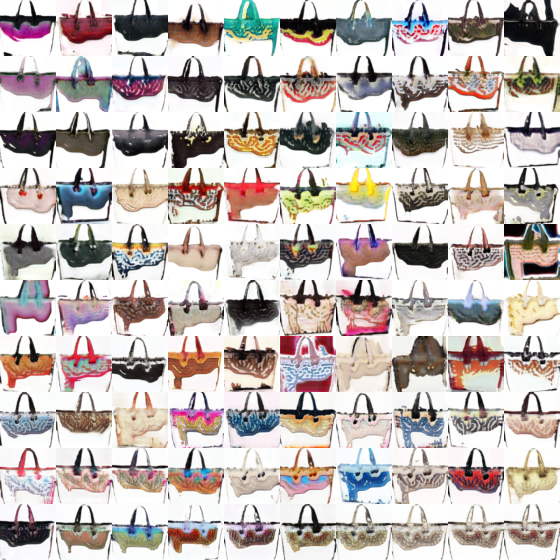

finish: [0/100]
finish: [10/100]
finish: [20/100]
finish: [30/100]
finish: [40/100]
finish: [50/100]
finish: [60/100]
finish: [70/100]
finish: [80/100]
finish: [90/100]


In [29]:
model_name = "cyclegan"

# A_gen A_recover
# B_gen B_recover

#opens images:
model_path = file_path+"\\"+model_name
model_filelist = glob(model_path+"\\*.png")

# print("compare:")
# for img_path in compare_filelist:
#     print(img_path)

# target_path = "D:\\GitHub\\!_results\\real\\bag_B\\1_B.jpg"
target = glob(file_path+"\\real.jpg") # target only one
# target = glob(target_path) # target only one
print("target picture:")
for img_path in target:
#     print(img_path)
    img_target = Image.open(img_path)
    display(img_target)

result_width, result_height = 560, 560
result_im = Image.new('RGB', (result_width, result_height))

x, y = 0, 0
step_size = 56

print("num of compare pictures: ",len(model_filelist))

for file in model_filelist:
    im = Image.open(file)
    im = im.resize((step_size, step_size), Image.BILINEAR )
    result_im.paste(im, (x,y))
    if y >= result_height:
        break
    else:
        x = x + step_size  
        if x >= result_width:
            x = 0
            y = y + step_size
            
            
print("compare pictures:")
display(result_im)
result_im.save(file_path+"\\"+model_name+".jpg", quality=100)

result_width, result_height = 560, 560
result_im = Image.new('RGB', (result_width, result_height))

# 依据图片直方图距离计算相似度
cyclegan_histogram_list = []

# 平均哈希算法计算相似度
cyclegan_aHash_list = []

# 感知哈希算法计算相似度
cyclegan_pHash_list = []

# 差异哈希算法计算相似度
cyclegan_dHash_list = []

# plt
cyclegan_data_h_list = []
cyclegan_data_a_list = []
cyclegan_data_p_list = []
cyclegan_data_d_list = []


# read image files
# img_target = Image.open(target[0])
img1 = img_target
img1_htg = htg.regularizeImage(img1)
hg1 = img1_htg.histogram()

for idx, img_location in enumerate(model_filelist):
    if idx % 10 == 0 :
        print("finish: [{}/{}]".format(idx, len(model_filelist)))
    
    img_compare = Image.open(img_location)    
    img2 = img_compare
    img2_htg = htg.regularizeImage(img2)
    hg2 = img2_htg.histogram()


    # draw the histogram in a no-blocking way
    sub_thread = Process(target=htg.drawHistogram, args=(hg1, hg2,))
    sub_thread.start()


    percentage = 64

    # print the histogram similarity 图片直方图距离
    cyclegan_his_result = htg.calMultipleHistogramSimilarity(img1_htg, img2_htg)
    cyclegan_histogram_list.append(cyclegan_his_result)
    cyclegan_data_h_list.append((idx, cyclegan_his_result))
    
    # aHash Calculation 平均哈希算法
    cyclegan_ahash_result = ah.calaHashSimilarity(img1, img2)/64
    cyclegan_aHash_list.append(cyclegan_ahash_result)
    cyclegan_data_a_list.append((idx, cyclegan_ahash_result))
    
    # pHash Calculation 感知哈希算法
    cyclegan_phash_result = ph.calpHashSimilarity(img1, img2)/64
    cyclegan_pHash_list.append(cyclegan_phash_result)
    cyclegan_data_p_list.append((idx, cyclegan_phash_result))
    
    # dHash Calculation 差异哈希算法
    cyclegan_dhash_result = dh.caldHashSimilarity(img1, img2)/64
    cyclegan_dHash_list.append(cyclegan_dhash_result)
    cyclegan_data_d_list.append((idx, cyclegan_dhash_result))
    

# pix2pix

target picture:
num of compare pictures:  100
compare pictures:


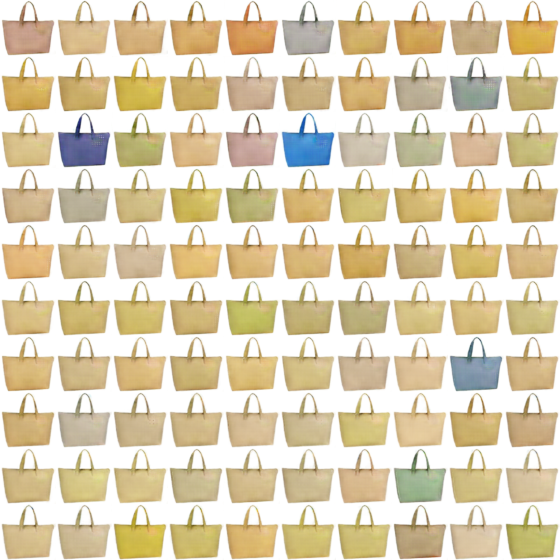

finish: [0/100]
finish: [10/100]
finish: [20/100]
finish: [30/100]
finish: [40/100]
finish: [50/100]
finish: [60/100]
finish: [70/100]
finish: [80/100]
finish: [90/100]


In [30]:
model_name = "pix2pix"

# A_gen A_recover
# B_gen B_recover

#opens images:
model_path = file_path+"\\"+model_name
model_filelist = glob(model_path+"\\*.png")

# print("compare:")
# for img_path in compare_filelist:
#     print(img_path)

# target_path = "D:\\GitHub\\!_results\\real\\bag_B\\1_B.jpg"
target = glob(file_path+"\\real.jpg") # target only one
# target = glob(target_path) # target only one
print("target picture:")
for img_path in target:
#     print(img_path)
    img_target = Image.open(img_path)
    display(img_target)

result_width, result_height = 560, 560
result_im = Image.new('RGB', (result_width, result_height))

x, y = 0, 0
step_size = 56

print("num of compare pictures: ",len(model_filelist))

for file in model_filelist:
    im = Image.open(file)
    im = im.resize((step_size, step_size), Image.BILINEAR )
    result_im.paste(im, (x,y))
    if y >= result_height:
        break
    else:
        x = x + step_size  
        if x >= result_width:
            x = 0
            y = y + step_size
            
            
print("compare pictures:")
display(result_im)
result_im.save(file_path+"\\"+model_name+".jpg", quality=100)

result_width, result_height = 560, 560
result_im = Image.new('RGB', (result_width, result_height))

# 依据图片直方图距离计算相似度
pix2pix_histogram_list = []

# 平均哈希算法计算相似度
pix2pix_aHash_list = []

# 感知哈希算法计算相似度
pix2pix_pHash_list = []

# 差异哈希算法计算相似度
pix2pix_dHash_list = []

# plt
pix2pix_data_h_list = []
pix2pix_data_a_list = []
pix2pix_data_p_list = []
pix2pix_data_d_list = []


# read image files
# img_target = Image.open(target[0])
img1 = img_target
img1_htg = htg.regularizeImage(img1)
hg1 = img1_htg.histogram()

for idx, img_location in enumerate(model_filelist):
    if idx % 10 == 0 :
        print("finish: [{}/{}]".format(idx, len(model_filelist)))
    
    img_compare = Image.open(img_location)    
    img2 = img_compare
    img2_htg = htg.regularizeImage(img2)
    hg2 = img2_htg.histogram()


    # draw the histogram in a no-blocking way
    sub_thread = Process(target=htg.drawHistogram, args=(hg1, hg2,))
    sub_thread.start()


    percentage = 64

    # print the histogram similarity 图片直方图距离
    pix2pix_his_result = htg.calMultipleHistogramSimilarity(img1_htg, img2_htg)
    pix2pix_histogram_list.append(pix2pix_his_result)
    pix2pix_data_h_list.append((idx, pix2pix_his_result))
    
    # aHash Calculation 平均哈希算法
    pix2pix_ahash_result = ah.calaHashSimilarity(img1, img2)/64
    pix2pix_aHash_list.append(pix2pix_ahash_result)
    pix2pix_data_a_list.append((idx, pix2pix_ahash_result))
    
    # pHash Calculation 感知哈希算法
    pix2pix_phash_result = ph.calpHashSimilarity(img1, img2)/64
    pix2pix_pHash_list.append(pix2pix_phash_result)
    pix2pix_data_p_list.append((idx, pix2pix_phash_result))
    
    # dHash Calculation 差异哈希算法
    pix2pix_dhash_result = dh.caldHashSimilarity(img1, img2)/64
    pix2pix_dHash_list.append(pix2pix_dhash_result)
    pix2pix_data_d_list.append((idx, pix2pix_dhash_result))
    

# boxplot

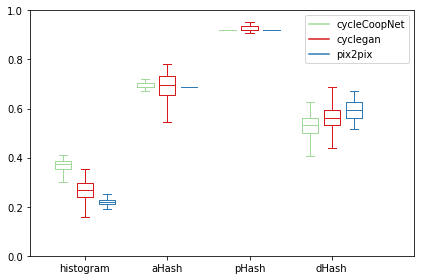

In [31]:

data_coopnet = [coopnet_histogram_list, coopnet_aHash_list, coopnet_pHash_list, coopnet_dHash_list]
data_cyclegan = [cyclegan_histogram_list, cyclegan_aHash_list, cyclegan_pHash_list, cyclegan_dHash_list]
data_pix2pix = [pix2pix_histogram_list, pix2pix_aHash_list, pix2pix_pHash_list, pix2pix_dHash_list]

# ticks = ['case A', 'case B', 'case C']
ticks = ['histogram', 'aHash', 'pHash', 'dHash']


def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()


bp_1 = plt.boxplot(data_coopnet, positions=np.array(range(len(data_coopnet)))*3.0-0.8, sym='', widths=0.6)
bp_2 = plt.boxplot(data_cyclegan, positions=np.array(range(len(data_cyclegan)))*3.0-0, sym='', widths=0.6)
bp_3 = plt.boxplot(data_pix2pix, positions=np.array(range(len(data_pix2pix)))*3.0+0.8, sym='', widths=0.6)
set_box_color(bp_1, '#a1d99b')
set_box_color(bp_2, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bp_3, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#a1d99b', label='cycleCoopNet')
plt.plot([], c='#D7191C', label='cyclegan')
plt.plot([], c='#2C7BB6', label='pix2pix')
plt.legend()

plt.xticks(range(0, len(ticks) * 3, 3), ticks)
plt.xlim(-2, len(ticks)*3)
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig(file_path+"\\boxplot.png")
plt.show()




# scatter

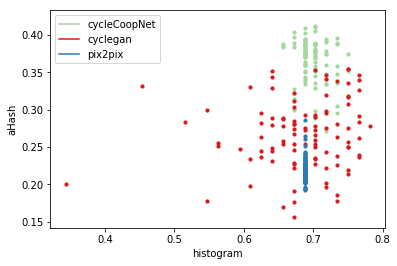

In [34]:
%matplotlib inline

#設定x軸範圍
# plt.xlim(0,1)
#設定y軸範圍
# plt.ylim(0,1)

plt.scatter(coopnet_aHash_list, coopnet_histogram_list, s=10, c='#a1d99b')
plt.scatter(cyclegan_aHash_list, cyclegan_histogram_list, s=10, c='#D7191C')
plt.scatter(pix2pix_aHash_list, pix2pix_histogram_list, s=10, c='#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#a1d99b', label='cycleCoopNet')
plt.plot([], c='#D7191C', label='cyclegan')
plt.plot([], c='#2C7BB6', label='pix2pix')
plt.xlabel("histogram")
plt.ylabel("aHash")
plt.legend()

plt.savefig(file_path+"\\scatter_compare.png")
plt.show()

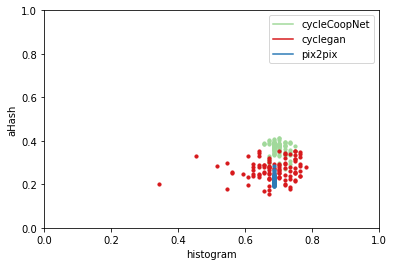

In [35]:
%matplotlib inline

#設定x軸範圍
plt.xlim(0,1)
#設定y軸範圍
plt.ylim(0,1)

plt.scatter(coopnet_aHash_list, coopnet_histogram_list, s=10, c='#a1d99b')
plt.scatter(cyclegan_aHash_list, cyclegan_histogram_list, s=10, c='#D7191C')
plt.scatter(pix2pix_aHash_list, pix2pix_histogram_list, s=10, c='#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#a1d99b', label='cycleCoopNet')
plt.plot([], c='#D7191C', label='cyclegan')
plt.plot([], c='#2C7BB6', label='pix2pix')
plt.xlabel("histogram")
plt.ylabel("aHash")
plt.legend()

plt.savefig(file_path+"\\scatter_01.png")
plt.show()